In [ ]:
#### Data ingestion
#### EDA
#### Feature engineering or preprocessing
#### Model building
#### Evalution

![Alt text](image-3.png)

## Feature Engineering
 1. Feature transformation
 2. Feature construction
 3. Feature selection
 4. Feature extraction



### Feature transformation
  1. Scaling
  2. Missing value 
  3. Handling outlier
  4. Encoding
  5. Mathematical formula

### Featuere construction
  1. Ex titanic data  : sibling and spouse + parent and child = family
  2. ticket number : It will be a Alpha numeric data. How to handle this type of column

### Feature selection
  1. We can build model with out feature selection
  2. 

In [ ]:
# Scaling

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/sharmaroshan/Social-Networks-Ads/master/Social_Network_Ads.csv")
df.sample()

,User ID,Gender,Age,EstimatedSalary,Purchased
286,15631070,Female,37.0,62000.0,0


# StandardScalar

In [ ]:
df=df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19.0,19000.0,0
1,35.0,20000.0,0
2,26.0,43000.0,0
3,27.0,57000.0,0
4,19.0,76000.0,0


In [ ]:
# purchased is the dependent column. depended on salary . 
# age and salary are contineous data so 

In [ ]:
# trian --> fit and transform
# test --> transform   (To avoid data leakage apply onlt transform)
# https://www.analyticsvidhya.com/blog/2021/04/difference-between-fit-transform-fit_transform-methods-in-scikit-learn-with-python-code/

#The fit() method helps in fitting the training dataset into an estimator (ML algorithms).
  #fit(X[, y, sample_weight]) Compute the mean and std to be used for later scaling.

#fit_transform(X[, y])
#Fit to data, then transform it.
#The transform() helps in transforming the data into a more suitable form for the model.
#The fit_transform() method combines the functionalities of both fit() and transform().
# transform(X[, copy])

# Perform standardization by centering and scaling.

# Frequently Asked Questions
# Q1. Can we use transform() without using fit() in scikit-learn?
# A. Yes, transform() method can be used without using fit() method in scikit-learn. This is useful when we want to transform new data using the same scaling or encoding applied to the training data.

# Q2. What is the purpose of fit_transform() in scikit-learn?
# A. The fit_transform() method is used to fit the data into a model and transform it into a form that is more suitable for the model in a single step. This saves us the time and effort of calling both fit() and transform() separately.

# Q3. Are there any limitations to using fit(), transform(), and fit_transform() methods in scikit-learn?
# A. The main limitation of these methods is that they may not work well with certain types of data, such as data with null values or outliers, and we might need to perform additional preprocessing steps.

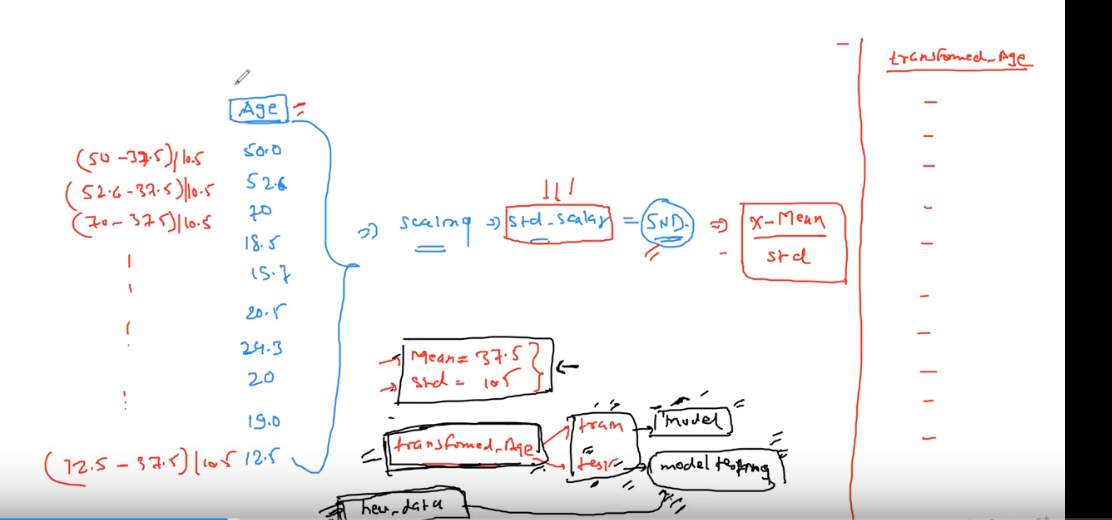

In [ ]:
# what is standard scalar?
# what if the new data comes after model training and model testing?
    # model performs well on trining data and testing data. but if new data comes model will fail. solution is do not allow data leakage.
    # perform standard scalar (fit and tranform )  on trian data and use the same mean , standard devaition to transform test data.

## trian test split
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              400 non-null    float64
 1   EstimatedSalary  400 non-null    float64
 2   Purchased        400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'], test_size=0.25)

In [ ]:
print(len(X_train))
X_train.head()

300


,Age,EstimatedSalary
236,40.0,57000.0
62,23.0,66000.0
60,27.0,20000.0
48,30.0,135000.0
65,24.0,58000.0


In [ ]:
X_test.head()
print(len(X_test))

100


In [ ]:
y_train.head()
print(len(y_train))

300


In [ ]:
y_test.head()
print(len(y_test))

100


### StandardScaler
trian the model only on trian data not on entire data. if not data leakage will happen.


In [ ]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(X_train)
X_train_scaled=scalar.transform(X_train)

In [ ]:
X_test_scaled=scalar.transform(X_test)

In [ ]:
X_train_scaled_df=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_train_scaled_df.head()

,Age,EstimatedSalary
0,0.237335,-0.304212
1,-1.402786,-0.040360
2,-1.016875,-1.388940
3,-0.727442,1.982511
4,-1.306308,-0.274895


In [ ]:
X_test_scaled_df=pd.DataFrame(X_test_scaled,columns=X_test.columns)
X_test_scaled_df.head()

,Age,EstimatedSalary
0,-0.245053,0.692564
1,-1.692219,0.428712
2,-0.534486,0.956417
3,0.333813,0.370078
4,-1.016875,0.604614


In [ ]:
X_train.describe()

,Age,EstimatedSalary
count,300.000000,300.000000
mean,37.540000,67376.666667
std,10.382407,34166.934115
min,18.000000,15000.000000
25%,29.000000,41750.000000
50%,37.000000,64500.000000
75%,46.000000,85000.000000
max,60.000000,150000.000000


In [ ]:
import numpy as np
np.round(X_train_scaled_df.describe(),1)

,Age,EstimatedSalary
count,300.0,300.0
mean,0.0,-0.0
std,1.0,1.0
min,-1.9,-1.5
25%,-0.8,-0.8
50%,-0.1,-0.1
75%,0.8,0.5
max,2.2,2.4


In [ ]:
X_test_scaled_df.describe()

,Age,EstimatedSalary
count,100.000000,100.000000
mean,0.044380,0.277436
std,1.044331,0.968825
min,-1.885174,-1.447574
25%,-0.630964,-0.428809
50%,0.092619,0.238151
75%,0.743843,0.817162
max,2.166889,2.422265


In [ ]:
# Effect of scaling

In [ ]:
X_test_scaled_df["EstimatedSalary"]

0     0.692564
1     0.428712
2     0.956417
3     0.370078
4     0.604614
        ...   
95   -0.362846
96   -0.157628
97    2.392948
98    2.070462
99    1.982511
Name: EstimatedSalary, Length: 100, dtype: float64

IndexError: ignored

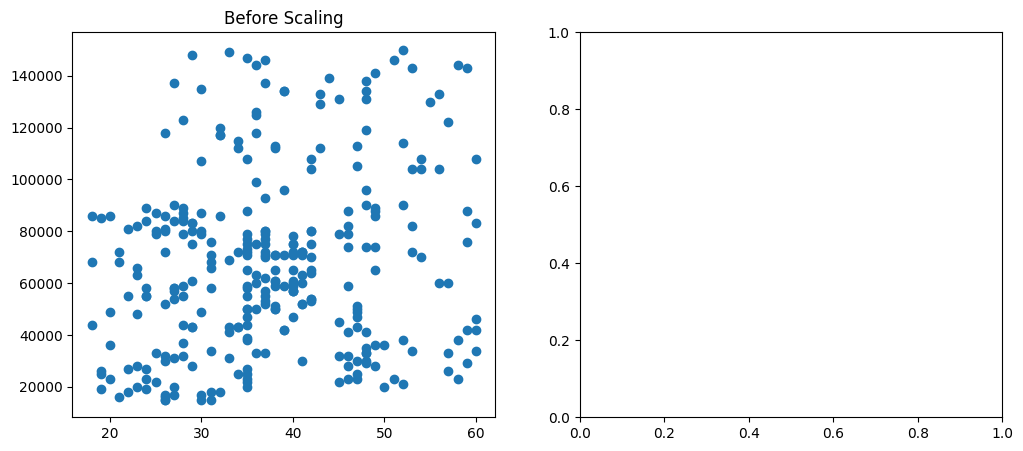

In [ ]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")

plt.show()

In [ ]:
import seaborn as sns
sns.kdeplot(X_train_scaled['EstimatedSalary'])

IndexError: ignored

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

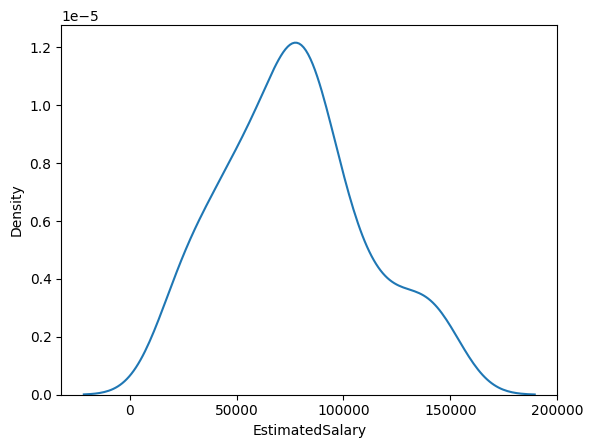

In [ ]:
import seaborn as sns
sns.kdeplot(X_test_s['EstimatedSalary'])

In [ ]:
# https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

Frequently Asked Questions
Q1. How is Standardization different from Normalization feature scaling?
A. Standardization involves transforming the features such that they have a mean of zero and a standard deviation of one. This is done by subtracting the mean and dividing by the standard deviation of each feature.

On the other hand, normalization scales the features to a fixed range, usually [0, 1]. This is done by subtracting the minimum value of each feature and dividing by the difference between the maximum value and the minimum value.

Q2. Why is Standardization used in machine learning?
A. Standardization ensures algorithmic stability and prevents sensitivity to the scale of input features, improves optimization algorithms’ convergence and search efficiency, and enhances the performance of certain machine learning algorithms.

Q3. Why is Normalization used in machine learning?
A. Normalization helps in scaling the input features to a fixed range, typically [0, 1], to ensure that no single feature disproportionately impacts the results. It preserves the relationship between the minimum and maximum values of each feature, which can be important for some algorithms. It also improves the convergence and stability of some machine learning algorithms, particularly those that use gradient-based optimization.

Q4. Why do we normalize values?
A. We normalize values to bring them into a common scale, making it easier to compare and analyze data. Normalization also helps to reduce the impact of outliers and improve the accuracy and stability of statistical models.

Q5. How do you normalize a set of values?
A. To normalize a set of values, we first calculate the mean and standard deviation of the data. Then, we subtract the mean from each value and divide by the standard deviation to obtain standardized values with a mean of 0 and a standard deviation of 1. Alternatively, we can use other normalization techniques such as min-max normalization, where we scale the values to a range of 0 to 1, or unit vector normalization, where we scale the values to have a length of 1

In [ ]:
# min-max

from sklearn.preprocessing import MinMaxScaler

scler_min_max=MinMaxScaler()

In [ ]:
scler_min_max.fit(X_train)

MinMaxScaler()

In [ ]:
X_train_min_max=scler_min_max.transform(X_train)
X_test_min_max=scler_min_max.transform(X_test)

In [ ]:
X_train_min_max = pd.DataFrame(X_train_min_max, columns=X_train.columns)
X_test_min_max = pd.DataFrame(X_test_min_max, columns=X_test.columns)

In [ ]:
np.round(X_train_min_max.describe(),1)

,Age,EstimatedSalary
count,300.0,300.0
mean,0.5,0.4
std,0.2,0.3
min,0.0,0.0
25%,0.3,0.2
50%,0.5,0.4
75%,0.7,0.5
max,1.0,1.0


In [ ]:
X_test_min_max

,Age,EstimatedSalary
0,0.404762,0.562963
1,0.047619,0.496296
2,0.333333,0.629630
3,0.547619,0.481481
4,0.214286,0.540741
...,...,...
95,0.476190,0.296296
96,0.285714,0.348148
97,0.571429,0.992593
98,0.809524,0.911111


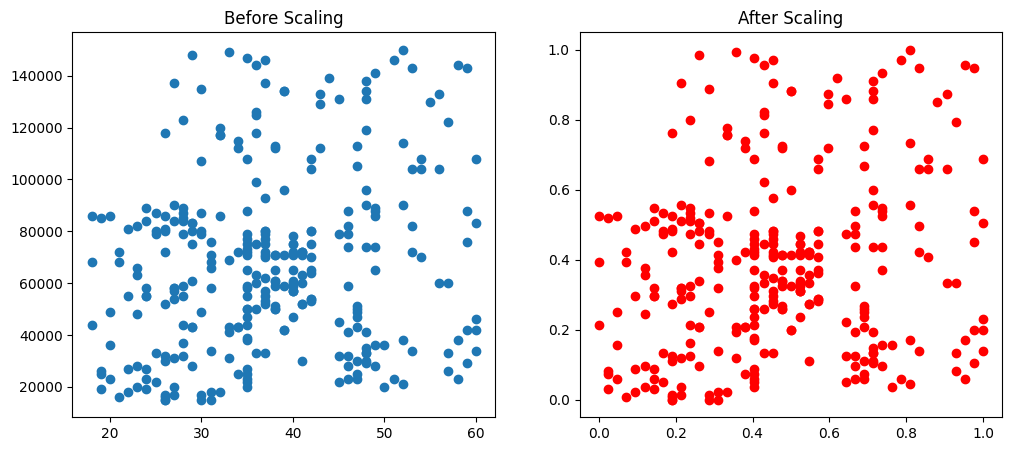

In [ ]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_min_max['Age'], X_train_min_max['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")

plt.show()

# when we should use which technique

In [ ]:
# CGPA=0 to 1 min-max for the specific range you can use min-max

# SALARY= if you dont know the range of the data you can use std_scaler



```
# This is formatted as code
```

# ENCODING

In [ ]:
df2=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day26-ordinal-encoding/customer.csv")

In [ ]:
df2.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [ ]:
df2=df2.iloc[:,2:-1]
df2.head()

,review,education
0,Average,School
1,Poor,UG
2,Good,PG
3,Good,PG
4,Average,UG


In [ ]:
df2.tail()

,review,education
45,Poor,PG
46,Poor,PG
47,Good,PG
48,Good,UG
49,Good,UG


In [ ]:
X_train,X_test=train_test_split(df2,test_size=0.25)

In [ ]:
X_train

,review,education
49,Good,UG
48,Good,UG
45,Poor,PG
43,Poor,PG
38,Good,School
14,Poor,PG
11,Good,UG
16,Poor,UG
24,Average,PG
26,Poor,PG


In [ ]:
X_test

,review,education
39,Poor,PG
26,Poor,PG
46,Poor,PG
5,Average,School
9,Good,UG
3,Good,PG
10,Good,UG
23,Good,School
17,Poor,UG
0,Average,School


In [ ]:
df2["review"].value_counts()

Poor       18
Good       18
Average    14
Name: review, dtype: int64

In [ ]:
df2["education"].value_counts()

PG        18
School    16
UG        16
Name: education, dtype: int64

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()

In [ ]:
encoder=OrdinalEncoder(categories=[['Poor','Average','Good'],["School","UG","PG"]])

In [ ]:
encoder.fit(X_train)

OrdinalEncoder(categories=[['Poor', 'Average', 'Good'], ['School', 'UG', 'PG']])

In [ ]:
X_train_encode=encoder.transform(X_train)

In [ ]:
X_train_encode

array([[0., 2.],
       [1., 2.],
       [2., 1.],
       [1., 2.],
       [2., 2.],
       [2., 0.],
       [0., 1.],
       [2., 2.],
       [1., 2.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [0., 2.],
       [0., 0.],
       [2., 0.],
       [2., 0.],
       [1., 1.],
       [2., 2.],
       [2., 1.],
       [1., 1.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [0., 2.],
       [1., 1.],
       [2., 2.],
       [2., 1.],
       [2., 0.],
       [2., 2.],
       [0., 2.],
       [0., 1.],
       [1., 1.],
       [1., 1.],
       [2., 1.],
       [0., 2.],
       [0., 0.]])

In [ ]:
encoder.transform(X_test)

array([[0., 2.],
       [0., 2.],
       [0., 2.],
       [1., 0.],
       [2., 1.],
       [2., 2.],
       [2., 1.],
       [2., 0.],
       [0., 1.],
       [1., 0.],
       [0., 2.],
       [2., 0.],
       [0., 0.]])

In [ ]:
df2.head()

,review,education
0,Average,School
1,Poor,UG
2,Good,PG
3,Good,PG
4,Average,UG


In [ ]:
df2

,review,education
0,Average,School
1,Poor,UG
2,Good,PG
3,Good,PG
4,Average,UG
5,Average,School
6,Good,School
7,Poor,School
8,Average,UG
9,Good,UG


In [ ]:
# https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/

In [ ]:
df2=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day26-ordinal-encoding/customer.csv")

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe=OneHotEncoder(drop="first",sparse=False,dtype=np.int32)

In [ ]:
ohe.fit(df2[["gender"]])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(drop='first', dtype=<class 'numpy.int32'>, sparse=False,
              sparse_output=False)

In [ ]:
ohe.transform(df2[["gender"]])

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

# handle missing value



In [ ]:
df3=pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

In [ ]:
# df3=df3[["Age","Fare","SibSp","Survived"]]

In [ ]:
df3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [ ]:
df3.head()

,Age,Fare,SibSp,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [ ]:
df3.isnull().mean()

Age         0.198653
Fare        0.000000
SibSp       0.000000
Survived    0.000000
dtype: float64

In [ ]:
# numeric--> mean,median

# categorical--> mode

In [ ]:
X_train,X_test=train_test_split(df3,test_size=0.25)

In [ ]:
X_train

,Age,Fare,SibSp,Survived
674,NaN,0.0000,0,0
493,71.0,49.5042,0,0
527,NaN,221.7792,0,0
441,20.0,9.5000,0,0
68,17.0,7.9250,4,1
...,...,...,...,...
785,25.0,7.2500,0,0
773,NaN,7.2250,0,0
569,32.0,7.8542,0,1
823,27.0,12.4750,0,1


In [ ]:
X_test

,Age,Fare,SibSp,Survived
497,NaN,15.1000,0,0
539,22.0,49.5000,0,1
229,NaN,25.4667,3,0
60,22.0,7.2292,0,0
622,20.0,15.7417,1,1
...,...,...,...,...
604,35.0,26.5500,0,1
859,NaN,7.2292,0,0
75,25.0,7.6500,0,0
890,32.0,7.7500,0,0


In [ ]:
mean_age=X_train["Age"].mean()

In [ ]:
X_train["Age"].fillna(mean_age)

674    29.158617
493    71.000000
527    29.158617
441    20.000000
68     17.000000
         ...    
785    25.000000
773    29.158617
569    32.000000
823    27.000000
523    44.000000
Name: Age, Length: 668, dtype: float64

In [ ]:
X_train["Age"].fillna(mean_age).isnull().sum()

0

In [ ]:
mediann_age=X_train["Age"].median()
X_train["Age"].fillna(mediann_age)

674    28.0
493    71.0
527    28.0
441    20.0
68     17.0
       ... 
785    25.0
773    28.0
569    32.0
823    27.0
523    44.0
Name: Age, Length: 668, dtype: float64

#sklearn

# perform  simpleimputer task!

In [ ]:
df3["Cabin"].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [ ]:
df3["Cabin"].fillna(df3["Cabin"].mode()[0])

0      B96 B98
1          C85
2      B96 B98
3         C123
4      B96 B98
        ...   
886    B96 B98
887        B42
888    B96 B98
889       C148
890    B96 B98
Name: Cabin, Length: 891, dtype: object

In [ ]:
## Multi variant , handling missing value

## KNN IMputer

#outlier handling and detection

An outlier is an object that deviates significantly from the rest of the objects. They can be caused by measurement or execution error. The analysis of outlier data is referred to as outlier analysis or outlier mining.

In [ ]:
import pandas as pd
df =pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day42-outlier-removal-using-zscore/placement.csv")

In [ ]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cgpa,1000.0,6.96124,0.615898,4.89,6.55,6.96,7.37,9.12
placement_exam_marks,1000.0,32.22500,19.130822,0.00,17.00,28.00,44.00,100.00
placed,1000.0,0.48900,0.500129,0.00,0.00,0.00,1.00,1.00


<ipython-input-9-44e6039cbedd>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
<ipython-input-9-44e6039cbedd>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


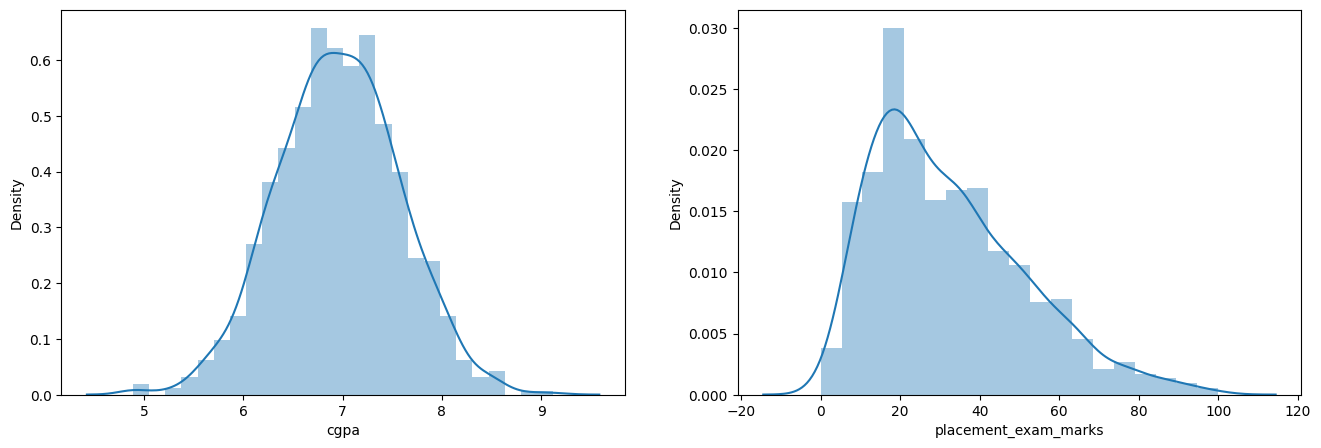

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [ ]:
df["placement_exam_marks"].skew()

0.8356419499466834

In [ ]:
df["placement_exam_marks"].mean()

32.225

In [ ]:
df["placement_exam_marks"].std()

19.13082233892112

In [ ]:
df["cgpa"].mean()

6.96124

In [ ]:
df["cgpa"].std()

0.6158978751323896

In [ ]:
df["cgpa"].min()

4.89

In [ ]:
df["cgpa"].max()

9.12

In [ ]:
df["cgpa"].mean()+3*df["cgpa"].std()

8.808933625397168

In [ ]:
df["cgpa"].mean()-3*df["cgpa"].std()

5.113546374602832

In [ ]:
df[df["cgpa"]>8.80]

,cgpa,placement_exam_marks,placed
995,8.87,44.0,1
996,9.12,65.0,1


In [ ]:
df[df["cgpa"]<5.11]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [ ]:
df[(df["cgpa"]>8.80)|(df["cgpa"]<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


Triming

In [ ]:
new_df=df[(df["cgpa"]<8.80)&(df["cgpa"]>5.11)]

In [ ]:
new_df.describe()

,cgpa,placement_exam_marks,placed
count,995.000000,995.000000,995.000000
mean,6.963357,32.188945,0.487437
std,0.600082,19.130298,0.500094
min,5.230000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.365000,44.000000,1.000000
max,8.620000,100.000000,1.000000


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 995 entries, 0 to 998
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  995 non-null    float64
 1   placement_exam_marks  995 non-null    float64
 2   placed                995 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 31.1 KB


<ipython-input-36-dd1eca269673>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])


<Axes: xlabel='cgpa', ylabel='Density'>

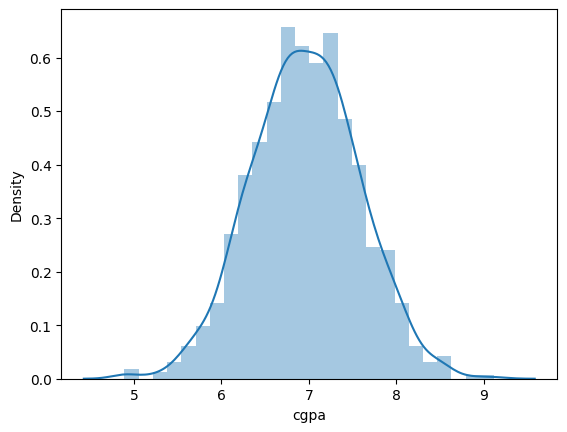

In [ ]:
sns.distplot(df['cgpa'])